In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
df_polynomial = pd.DataFrame({
    'x': [1,2,3,5,7,8,2.5,8],
    'y': [2.2,3.5,3.9,2.9,5,6.2,3,4.8]
})

In [30]:
ws_squared = np.array([2.7167995,0.03485877,0.03821489])
ws_squared

array([2.7167995 , 0.03485877, 0.03821489])

In [31]:
df_polynomial['y_pred_quadratic'] = ws_squared[0] + ws_squared[1]*df_polynomial['x'] + ws_squared[2]*df_polynomial['x']**2
df_polynomial

,x,y,y_pred_quadratic
0,1.0,2.2,2.789873
1,2.0,3.5,2.939377
2,3.0,3.9,3.165310
3,5.0,2.9,3.846466
4,7.0,5.0,4.833341
5,8.0,6.2,5.441423
6,2.5,3.0,3.042789
7,8.0,4.8,5.441423


In [32]:
class polynomial_matrices():
    def __init__(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
    def og_plot(self):
        return plt.scatter(self.x, self.y)
    def square(self,element):
        return element**2
    def cube(self,element):
        return element**3
    def original(self,element):
        return element
    def ones(self,element):
        return element/element
    def fours(self,element):
        return element**4
    def get_ws(self, matrix, y):
        matrix_T = matrix.transpose()
        matrix_T_inv = np.linalg.inv(matrix_T@matrix)
        #ws = matrix_T_inv@matrix_T@y
        return matrix_T_inv@matrix_T@y
    def quadratic(self):
        square_lst = [self.ones, self.original, self.square]
        new_lst = []
        for xs in list(self.x):
            for funcs in square_lst:
                #print(y(x))
                new_lst.append(funcs(xs))
        new_lst2 = np.array(new_lst)
        new_lst2 = new_lst2.reshape(len(self.x),3)
        ws = self.get_ws(new_lst2, self.y)
        fig, ax = plt.subplots(1,1)
        x_values = np.arange(min(self.x),max(self.x),0.1)
        y_values = [ws[0] + ws[1]*x_val + ws[2]*x_val**2 for x_val in x_values]
        plt.scatter(self.x, self.y)
        plt.plot(x_values,y_values)
        return plt.show()
    def quadratic_coefs(self):
        square_lst = [self.ones, self.original, self.square]
        new_lst = []
        for xs in list(self.x):
            for funcs in square_lst:
                #print(y(x))
                new_lst.append(funcs(xs))
        new_lst2 = np.array(new_lst)
        #remember that the reshape 2nd argument is 1 more than the number you are multiplying to the power of
        #e.g. if you're doing quadratic (x**2), the second argument of reshape is 3
        new_lst2 = new_lst2.reshape(len(self.x),3)
        ws = self.get_ws(new_lst2, self.y)
        return ws
    def quadratic_mse(self):
        y_hat = [self.quadratic_coefs()[0] + self.quadratic_coefs()[1]*x + 
                 self.quadratic_coefs()[2]*x**2 for x in animals.log10]
        mean_squared_error = ((self.y - y_hat)**2).sum()/len(self.y)
        return mean_squared_error
    def cubic(self):
        square_lst = [self.ones, self.original, self.square, self.cube]
        new_lst = []
        for xs in list(self.x):
            for funcs in square_lst:
                #print(y(x))
                new_lst.append(funcs(xs))
        new_lst2 = np.array(new_lst)
        new_lst2 = new_lst2.reshape(len(self.x),4)
        ws = self.get_ws(new_lst2, self.y)
        fig, ax = plt.subplots(1,1)
        x_values = np.arange(min(self.x),max(self.x),0.1)
        y_values = [ws[0] + ws[1]*x_val + ws[2]*x_val**2 + ws[3]*x_val**3 for x_val in x_values]
        plt.scatter(self.x, self.y)
        plt.plot(x_values,y_values)
        return plt.show() 
    def cubic_coefs(self):
        square_lst = [self.ones, self.original, self.square, self.cube]
        new_lst = []
        for xs in list(self.x):
            for funcs in square_lst:
                #print(y(x))
                new_lst.append(funcs(xs))
        new_lst2 = np.array(new_lst)
        new_lst2 = new_lst2.reshape(len(self.x),4)
        ws = self.get_ws(new_lst2, self.y)
        return ws
    def cubic_mse(self):
        y_hat = [self.cubic_coefs()[0] + self.cubic_coefs()[1]*x + 
                 self.cubic_coefs()[2]*x**2 + self.cubic_coefs()[3]*x**3for x in animals.log10]
        mean_squared_error = ((self.y - y_hat)**2).sum()/len(self.y)
        return mean_squared_error

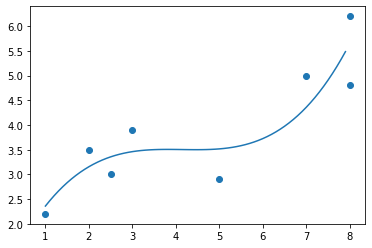

In [33]:
test = polynomial_matrices(df_polynomial.x, df_polynomial.y)
test.cubic()